## Siemens - Data Exploration

In [1]:
import pandas
import pathlib

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

sns.set_theme()

---

In [4]:
cwd = pathlib.Path().cwd()
data_path = cwd / "data"

In [5]:
[p.name for p in data_path.iterdir() if p.as_posix().endswith("csv")]

['events.csv',
 'velocities.csv',
 'disruptions.csv',
 'Mapping_Events_Disruptions.csv']

In [6]:
mapping_events_fpath = data_path / "Mapping_Events_Disruptions.csv"
events_fpath = data_path / "events.csv"
velocities_fpath = data_path / "velocities.csv"
disruptions_fpath = data_path / "disruptions.csv"

---

### Mapping Events

In [7]:
mapping_events = pandas.read_csv(mapping_events_fpath)

In [8]:
mapping_events.head()

,ID,EventDisruptionCode,DescriptionGerman,DescriptionEnglish,RelevantForChallenge,Notes
0,1,960862267,Stoerung: Zwangsbremse wurde aktiviert,Disruption: Emergency brake activated,x,NaN
1,2,960862267,Zwangsbremse wurde aktiviert,Emergency brake activated,x,NaN
2,3,960862258,Keine Linienleitertelegramme empfangen,No loop telegrams received,x,NaN
3,4,960862258,Stoerung: Linienleitertelegramme wurden erwart...,Disruption: loop telegrams expected but none r...,x,NaN
4,5,960862257,Position unverifiziert (Eichung falsch),Position not verified (wrong calibration),NaN,NaN


In [9]:
mapping_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    54 non-null     int64 
 1   EventDisruptionCode   54 non-null     int64 
 2   DescriptionGerman     54 non-null     object
 3   DescriptionEnglish    54 non-null     object
 4   RelevantForChallenge  7 non-null      object
 5   Notes                 6 non-null      object
dtypes: int64(2), object(4)
memory usage: 2.7+ KB


---

### Events

In [10]:
events = pandas.read_csv(events_fpath)

In [11]:
events.head()

,ID,DateTime,EventCode,Description
0,352,2020-01-22 04:22:15,1698873063,Zwangsbremsung | Initialisierung
1,353,2020-01-22 04:23:11,977419008,Zugdaten bestaetigt: | Zuglaenge [dm]: 410 | B...
2,354,2020-01-22 09:52:49,977419008,Zugdaten bestaetigt: | Zuglaenge [dm]: 410 | B...
3,355,2020-01-22 09:55:37,1698873063,Zwangsbremsung | Initialisierung
4,356,2020-01-22 10:03:11,1698873063,Zwangsbremsung | Initialisierung


In [12]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32972 entries, 0 to 32971
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           32972 non-null  int64 
 1   DateTime     32972 non-null  object
 2   EventCode    32972 non-null  int64 
 3   Description  32972 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


---

### Disruptions

In [13]:
disruptions = pandas.read_csv(disruptions_fpath)

In [14]:
disruptions.head()

,ID,DateTime,DisruptionCode,Description
0,1,2020-02-08 04:37:25,960862267,Stoerung: Zwangsbremse wurde aktiviert
1,2,2020-02-08 04:41:39,960862267,Stoerung: Zwangsbremse wurde aktiviert
2,3,2020-02-08 08:06:31,960862267,Stoerung: Zwangsbremse wurde aktiviert
3,4,2020-02-08 16:18:53,960862267,Stoerung: Zwangsbremse wurde aktiviert
4,5,2020-02-10 03:06:12,960862267,Stoerung: Zwangsbremse wurde aktiviert


In [15]:
disruptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2117 non-null   int64 
 1   DateTime        2117 non-null   object
 2   DisruptionCode  2117 non-null   int64 
 3   Description     2117 non-null   object
dtypes: int64(2), object(2)
memory usage: 66.3+ KB


---

### Velocities

In [2]:
import random

In [5]:
# Load the entire csv
# velocities = pandas.read_csv(velocities_fpath)

# Partially load the csv (it's 1+GB)
n_entries = 29_772_325
sample_size = 10_000
skiprows = random.sample(range(29772325), k=sample_size)
velocities = pd.read_csv(velocities_fpath, skiprows=skiprows)

NameError: name 'pd' is not defined

In [17]:
velocities.head()

,ID,DateTime,CurrentVelocity,AllowedVelocity,EmergencyStopLimit
0,19642270,2020-01-22 00:00:01,0,0,0
1,19642271,2020-01-22 00:00:02,0,0,0
2,19642272,2020-01-22 00:00:03,0,0,0
3,19642273,2020-01-22 00:00:04,0,0,0
4,19642274,2020-01-22 00:00:05,0,0,0


In [18]:
velocities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29772325 entries, 0 to 29772324
Data columns (total 5 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ID                  int64 
 1   DateTime            object
 2   CurrentVelocity     int64 
 3   AllowedVelocity     int64 
 4   EmergencyStopLimit  int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ GB


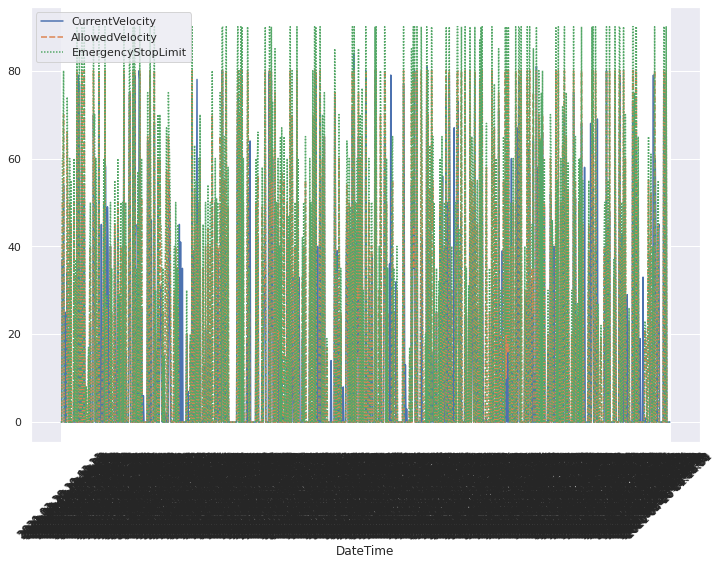

In [19]:
_ = sns.lineplot(data = velocities.set_index("DateTime").drop("ID", axis=1).sample(1_000))
_ = plt.xticks(rotation=45)

---